In [1]:
# CÉLULA 1 (VERSÃO FINAL CORRIGIDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print("Bibliotecas importadas.")
filepath = '../data/raw/train_FD001.txt'

if not os.path.exists(filepath):
    print(f"Erro: Arquivo não encontrado em '{filepath}'")
else:
    print(f"Carregando dados de '{filepath}'...")
    df_raw = pd.read_csv(filepath, sep=' ', header=None)

    # 1. Limpeza
    df_raw = df_raw.dropna(axis=1, how='all')
    print(f"Shape após limpeza: {df_raw.shape}") # Deve ser (xxxxx, 26)

    # 2. Nomes das Colunas (AQUI ESTÁ A CORREÇÃO)
    id_cols = ['engine_id', 'cycle']                       
    settings_cols = ['setting_1', 'setting_2', 'setting_3'] 

    # range(1, 22) GERA 21 SENSORES
    sensor_cols = [f'sensor_{i}' for i in range(1, 22)]   

    # 2 + 3 + 21 = 26 COLUNAS
    all_cols = id_cols + settings_cols + sensor_cols

    # --- VERIFICAÇÃO CRÍTICA ---
    print(f"\n!!! VERIFICAÇÃO: O número de nomes de colunas é: {len(all_cols)} !!!\n")
    # --- FIM DA VERIFICAÇÃO ---

    # 3. Atribuir Nomes
    df_raw.columns = all_cols

    print("DataFrame com nomes de colunas:")
    display(df_raw.head())

Bibliotecas importadas.
Carregando dados de '../data/raw/train_FD001.txt'...
Shape após limpeza: (20631, 26)

!!! VERIFICAÇÃO: O número de nomes de colunas é: 26 !!!

DataFrame com nomes de colunas:


,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Iniciando Passo 2: Cálculo do RUL...

Ciclo máximo (falha) para os 5 primeiros motores:


,engine_id,max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269



DataFrame atualizado com a coluna 'RUL':


,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187



(Recomendação: 'pip install seaborn' para gráficos melhores)


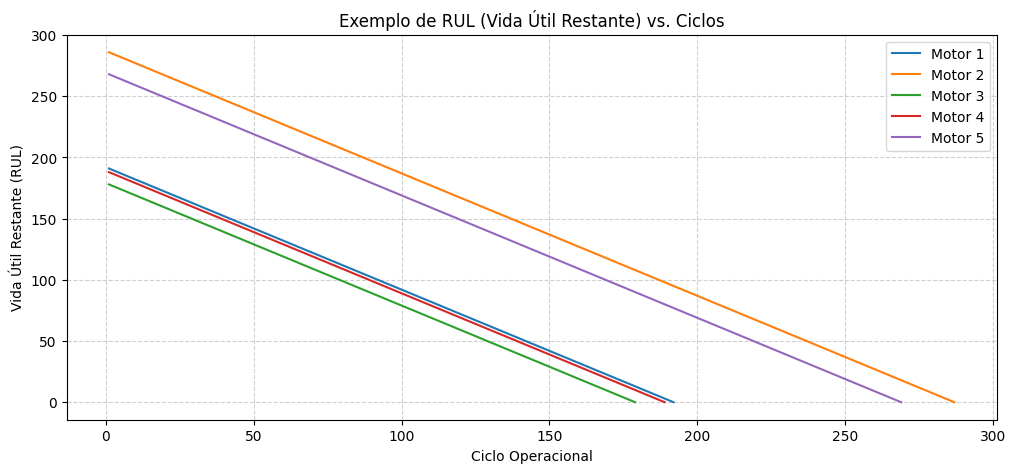


Passo 2 concluído com sucesso!


In [2]:
# Célula 2: Passo 2 - Cálculo do RUL (Remaining Useful Life)

print("Iniciando Passo 2: Cálculo do RUL...")

# Verificar se df_raw existe antes de prosseguir
if 'df_raw' not in locals():
    print("Erro: DataFrame 'df_raw' não encontrado.")
    print("Por favor, execute a Célula 1 primeiro.")
else:
    # 2.1. Encontrar o ciclo máximo (ciclo de falha) para cada motor
    # Agrupamos os dados por 'engine_id' e encontramos o valor máximo da coluna 'cycle'
    max_cycles = df_raw.groupby('engine_id')['cycle'].max().reset_index()
    max_cycles.columns = ['engine_id', 'max_cycle']
    
    print("\nCiclo máximo (falha) para os 5 primeiros motores:")
    display(max_cycles.head())

    # 2.2. Juntar (merge) essa informação de volta ao DataFrame original
    # Agora, cada linha do df_raw saberá qual é o ciclo de falha do seu motor
    df_train = pd.merge(df_raw, max_cycles, on='engine_id', how='left')

    # 2.3. Calcular o RUL
    # RUL = Ciclo Máximo (falha) - Ciclo Atual
    df_train['RUL'] = df_train['max_cycle'] - df_train['cycle']
    
    # 2.4. Remover colunas auxiliares
    # A coluna 'max_cycle' foi útil apenas para o cálculo, não é uma feature
    df_train = df_train.drop(columns=['max_cycle'])

    print("\nDataFrame atualizado com a coluna 'RUL':")
    display(df_train.head())

    # 2.5. Visualizar o RUL
    # Vamos plotar o RUL para alguns motores para confirmar
    plt.figure(figsize=(12, 5))
    
    # Filtrar dados para os primeiros 5 motores
    motores_exemplo = df_train[df_train['engine_id'].isin([1, 2, 3, 4, 5])]
    
    # Usar seaborn para plotar múltiplas linhas (opcional, mas fica bom)
    try:
        import seaborn as sns
        sns.lineplot(data=motores_exemplo, x='cycle', y='RUL', hue='engine_id', palette='viridis')
        plt.title('Exemplo de RUL (Vida Útil Restante) vs. Ciclos')
        plt.xlabel('Ciclo Operacional')
        plt.ylabel('Vida Útil Restante (RUL)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    except ImportError:
        print("\n(Recomendação: 'pip install seaborn' para gráficos melhores)")
        # Plot básico com matplotlib se seaborn não estiver instalado
        for engine_id in [1, 2, 3, 4, 5]:
            dados_motor = df_train[df_train['engine_id'] == engine_id]
            plt.plot(dados_motor['cycle'], dados_motor['RUL'], label=f'Motor {engine_id}')
        plt.legend()
        plt.title('Exemplo de RUL (Vida Útil Restante) vs. Ciclos')
        plt.xlabel('Ciclo Operacional')
        plt.ylabel('Vida Útil Restante (RUL)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    print("\nPasso 2 concluído com sucesso!")

In [3]:
# Célula 3: Passo 3 - Feature Engineering e Sequenciamento

from sklearn.preprocessing import MinMaxScaler
import joblib # Para salvar nosso 'scaler'
import os

print("Iniciando Passo 3: Feature Engineering e Sequenciamento...")

if 'df_train' not in locals():
    print("Erro: DataFrame 'df_train' não encontrado.")
    print("Por favor, execute as Células 1 e 2 primeiro.")
else:
    # --- 3.1: Seleção de Features ---
    
    # Colunas de 'identificação' e o 'alvo' (RUL)
    id_cols = ['engine_id', 'cycle']
    target_col = 'RUL'
    
    # Encontrar colunas com variação zero (constantes)
    std_devs = df_train.std()
    constant_cols = std_devs[std_devs == 0].index.tolist()
    
    print(f"Colunas constantes (variação zero) encontradas: {constant_cols}")
    
    # Remover colunas constantes e de configuração que não são úteis
    # (Com base na documentação, 'setting_3' e vários sensores são constantes)
    cols_to_drop = constant_cols + ['setting_3'] # 'setting_3' também é constante
    
    # Lista final de colunas de 'features' que usaremos para o modelo
    # Começa com todas, remove as de ID, o alvo (RUL) e as inúteis
    all_cols = df_train.columns.tolist()
    feature_cols = [
        col for col in all_cols 
        if col not in id_cols + [target_col] + cols_to_drop
    ]
    
    print(f"\nUsaremos {len(feature_cols)} features para o treinamento:")
    print(feature_cols)

    # --- 3.2: Normalização (Scaling) ---
    
    # Usaremos o MinMaxScaler para colocar todas as features entre 0 e 1
    scaler = MinMaxScaler()
    
    # 'Fit' (aprende a escala) e 'Transform' (aplica a escala)
    # APENAS nas colunas de features do df_train
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    
    print("\nFeatures normalizadas (escaladas entre 0 e 1).")
    
    # --- Salvando os 'artefatos' para uso futuro (API/Teste) ---
    
    # Criar a pasta /models se ela não existir
    models_dir = '../models'
    os.makedirs(models_dir, exist_ok=True)
    
    # Salvar o scaler
    scaler_path = os.path.join(models_dir, 'scaler.pkl')
    joblib.dump(scaler, scaler_path)
    print(f"Scaler salvo em: {scaler_path}")

    # Salvar o df processado (opcional, mas boa prática)
    processed_data_dir = '../data/processed'
    os.makedirs(processed_data_dir, exist_ok=True)
    df_train.to_csv(os.path.join(processed_data_dir, 'train_FD001_processed.csv'), index=False)
    print("DataFrame processado salvo em: ../data/processed/")

    # --- 3.3: Função de Sequenciamento (Janelas Deslizantes) ---
    
    def create_sequences(data, sequence_length, feature_cols, target_col):
        """
        Transforma um DataFrame de séries temporais em sequências (janelas)
        para LSTMs.
        """
        X_list = []
        y_list = []
        
        # Agrupar por motor para que as sequências não cruzem motores
        for engine_id, group in data.groupby('engine_id'):
            engine_features = group[feature_cols].values
            engine_target = group[target_col].values
            
            # Criar as janelas deslizantes para este motor
            # range(len(engine_features) - sequence_length) garante que não saímos do limite
            for i in range(len(engine_features) - sequence_length):
                # Pega a sequência de 'i' até 'i + sequence_length'
                seq_x = engine_features[i:i + sequence_length]
                # Pega o RUL no FINAL da sequência
                seq_y = engine_target[i + sequence_length]
                
                X_list.append(seq_x)
                y_list.append(seq_y)
                
        return np.array(X_list), np.array(y_list)

    # --- 3.4: Aplicação da Função ---
    
    # Definir o tamanho da nossa "memória" (quantos ciclos passados a LSTM vai olhar)
    SEQUENCE_LENGTH = 50 
    
    print(f"\nCriando sequências com tamanho {SEQUENCE_LENGTH}...")
    
    X_train, y_train = create_sequences(df_train, SEQUENCE_LENGTH, feature_cols, target_col)
    
    # --- 3.5: Verificação (Sanity Check) ---
    
    print("\nFormatos (Shapes) dos dados de treinamento prontos para o modelo:")
    print(f"X_train (features): {X_train.shape}")
    print(f"y_train (alvo):     {y_train.shape}")
    
    print("\nExplicação do Shape de X_train (amostras, passos_de_tempo, features):")
    print(f"  {X_train.shape[0]} amostras de treinamento (janelas)")
    print(f"  {X_train.shape[1]} passos de tempo (ciclos) por amostra (nossa SEQUENCE_LENGTH)")
    print(f"  {X_train.shape[2]} features (sensores/configurações) por passo de tempo")

    print("\nPasso 3 concluído com sucesso!")

Iniciando Passo 3: Feature Engineering e Sequenciamento...
Colunas constantes (variação zero) encontradas: ['setting_3', 'sensor_1', 'sensor_10', 'sensor_18', 'sensor_19']

Usaremos 19 features para o treinamento:
['setting_1', 'setting_2', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_20', 'sensor_21']

Features normalizadas (escaladas entre 0 e 1).
Scaler salvo em: ../models\scaler.pkl
DataFrame processado salvo em: ../data/processed/

Criando sequências com tamanho 50...

Formatos (Shapes) dos dados de treinamento prontos para o modelo:
X_train (features): (15631, 50, 19)
y_train (alvo):     (15631,)

Explicação do Shape de X_train (amostras, passos_de_tempo, features):
  15631 amostras de treinamento (janelas)
  50 passos de tempo (ciclos) por amostra (nossa SEQUENCE_LENGTH)
  19 features (sensores/configurações) por passo de tempo

Pa

TensorFlow Versão: 2.20.0


C:\Users\Riquelmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,501 (310.55 KB)

 Trainable params: 79,501 (310.55 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando o treinamento do modelo...
Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 4229.0322 - mae: 50.7822 - val_loss: 4708.7139 - val_mae: 54.3284
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 2955.9924 - mae: 44.0880 - val_loss: 4760.6372 - val_mae: 54.4318
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - loss: 2875.6060 - mae: 43.2674 - val_loss: 3130.8369 - val_mae: 39.5103
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 940.6909 - mae: 20.7417 - val_loss: 1300.7413 - val_mae: 25.1919
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - loss: 676.4609 - mae: 17.4534 - val_loss: 1270.9932 - val_mae: 23.4042
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - loss: 629.1011 - mae: 16.7521 - val_loss: 1078.0566 - val_mae: 22.7069
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - loss: 607.6852 - mae: 16.4849 - val_loss: 1100.8099 - val_mae: 21.2518
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - loss: 


Treinamento concluído.
Modelo salvo com sucesso em: ../models\rul_predictor_lstm.h5

Plotando histórico de perda (Loss)...


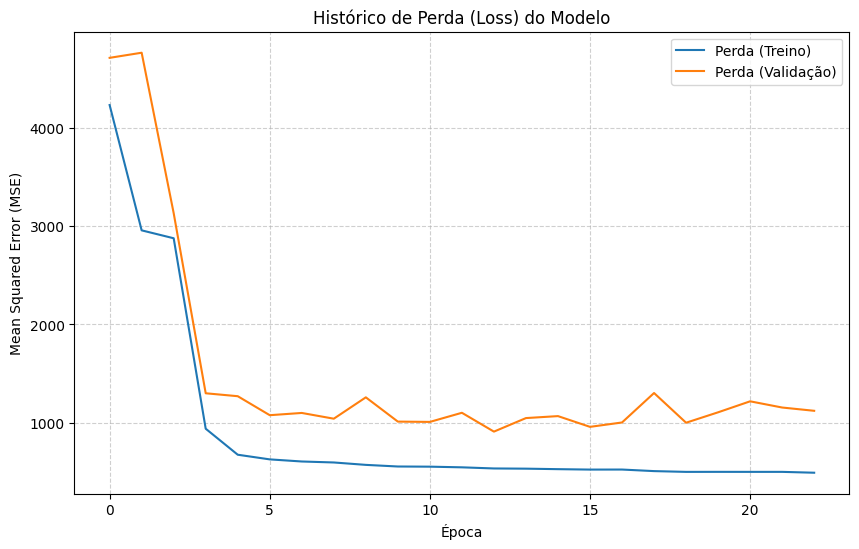

In [4]:
# Célula 4: Passo 4 - Modelagem e Treinamento (LSTM)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print(f"TensorFlow Versão: {tf.__version__}")

# Verificar se as variáveis de treino existem
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Erro: Variáveis 'X_train' ou 'y_train' não encontradas.")
    print("Por favor, execute as Células 1, 2 e 3 primeiro.")
else:
    # --- 4.1: Definir a Arquitetura do Modelo ---
    
    # Pegar os 'shapes' dos dados de treino
    # X_train.shape[1] = SEQUENCE_LENGTH (50)
    # X_train.shape[2] = num_features (19)
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    model = Sequential()
    
    # Camada LSTM 1
    # return_sequences=True é necessário se houver outra camada LSTM depois
    model.add(LSTM(
        units=100, 
        return_sequences=True, 
        input_shape=input_shape
    ))
    model.add(Dropout(0.2)) # Dropout para evitar overfitting
    
    # Camada LSTM 2
    model.add(LSTM(
        units=50, 
        return_sequences=False # False é o padrão, não retorna sequência
    ))
    model.add(Dropout(0.2))
    
    # Camada Densa (Totalmente Conectada)
    # 25 neurônios, função de ativação 'relu'
    model.add(Dense(units=25, activation='relu'))
    
    # Camada de Saída
    # 1 neurônio (pois queremos prever 1 valor: o RUL)
    # Ativação 'linear' (padrão para regressão)
    model.add(Dense(units=1))

    # --- 4.2: Compilar o Modelo ---
    
    # Loss: 'mean_squared_error' (MSE) é o padrão para regressão
    # Optimizer: 'adam' é um otimizador eficiente e popular
    # Metrics: 'mean_absolute_error' (MAE) é mais fácil de interpretar que o MSE
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    
    # Imprimir um resumo da arquitetura
    model.summary()

    # --- 4.3: Treinar o Modelo ---
    
    print("\nIniciando o treinamento do modelo...")
    
    # Parada Antecipada (EarlyStopping)
    # Monitora 'val_loss' (perda na validação)
    # 'patience=10': espera 10 épocas. Se não melhorar, para o treino.
    # 'restore_best_weights=True': restaura os pesos do modelo da melhor época.
    early_stop = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        verbose=1, 
        restore_best_weights=True
    )

    # validation_split=0.2: Separa 20% dos dados de treino para validação
    # batch_size=32: Processa o treino em lotes de 32 amostras
    # epochs=100: Número máximo de épocas (o EarlyStopping pode parar antes)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nTreinamento concluído.")

    # --- 4.4: Salvar o Modelo Treinado ---
    
    # Salvar o modelo treinado na pasta /models
    model_path = os.path.join(models_dir, 'rul_predictor_lstm.h5') # models_dir foi definido na Célula 3
    model.save(model_path)
    print(f"Modelo salvo com sucesso em: {model_path}")

    # --- 4.5: Visualizar o Histórico de Treinamento ---
    
    print("\nPlotando histórico de perda (Loss)...")
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Perda (Treino)')
    plt.plot(history.history['val_loss'], label='Perda (Validação)')
    plt.title('Histórico de Perda (Loss) do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [ ]:
# Célula 5: Passo 5 - Avaliação (VERSÃO COM PATCH v2 - Corrigindo Padding)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

print("Iniciando Passo 5: Avaliação no Conjunto de Teste...")

# --- 5.1: Carregar Dados de Teste ---
test_filepath = '../data/raw/test_FD001.txt'
rul_filepath = '../data/raw/RUL_FD001.txt'

try:
    df_test_raw = pd.read_csv(test_filepath, sep=' ', header=None)
    df_rul = pd.read_csv(rul_filepath, sep=' ', header=None)
except FileNotFoundError:
    print(f"Erro: Arquivos de teste não encontrados. Verifique os caminhos.")
    df_test_raw = pd.DataFrame()

if not df_test_raw.empty:
    
    # --- 5.2: Preparar Dados de Teste (Processamento) ---
    
    # 1. Limpar colunas NaN
    df_test_raw = df_test_raw.dropna(axis=1, how='all')
    
    # 2. Renomear colunas (Patch v1)
    id_cols_patch = ['engine_id', 'cycle']
    settings_cols_patch = ['setting_1', 'setting_2', 'setting_3']
    sensor_cols_patch = [f'sensor_{i}' for i in range(1, 22)] # 21 sensores
    all_cols_correta = id_cols_patch + settings_cols_patch + sensor_cols_patch
    
    df_test_raw.columns = all_cols_correta
    
    # 3. Carregar o Scaler salvo
    try:
        # Carregar variáveis salvas da Célula 3
        scaler = joblib.load(scaler_path)
        seq_len = SEQUENCE_LENGTH
        num_features = len(feature_cols)
        
        print(f"Scaler carregado de '{scaler_path}'")
        print(f"Usando sequence_length={seq_len} e num_features={num_features}")
        
    except NameError:
        print("Erro: Variáveis da Célula 3 não encontradas (scaler_path, SEQUENCE_LENGTH, feature_cols).")
        print("Por favor, execute a Célula 3 primeiro.")
        
    # 4. Normalizar as features de teste
    df_test_raw[feature_cols] = scaler.transform(df_test_raw[feature_cols])

    # 5. Processar os RULs verdadeiros
    df_rul = df_rul.dropna(axis=1, how='all')
    df_rul.columns = ['RUL_verdadeiro']
    df_rul['engine_id'] = df_rul.index + 1

    print("Dados de teste e RULs verdadeiros carregados e processados.")
    
    # --- 5.3: Criar Sequências de Teste (AQUI ESTÁ A CORREÇÃO V2) ---
    
    X_test_list = []
    
    for engine_id, group in df_test_raw.groupby('engine_id'):
        engine_features = group[feature_cols].values
        
        # Pegar os últimos 'seq_len' ciclos (ou menos)
        raw_seq = engine_features[-seq_len:]
        
        # Criar um "molde" de zeros com o shape exato (ex: 50, 19)
        padded_seq = np.zeros((seq_len, num_features))
        
        # "Colar" a sequência real (raw_seq) no *final* do molde
        # Se raw_seq tem (30, 19), ele preenche os últimos 30 slots
        padded_seq[-raw_seq.shape[0]:] = raw_seq
        
        X_test_list.append(padded_seq)
        
    # Agora todos os 100 itens em X_test_list têm o shape (50, 19)
    X_test = np.array(X_test_list)
    y_test = df_rul['RUL_verdadeiro'].values
    
    print("\nFormatos (Shapes) dos dados de teste prontos para previsão:")
    print(f"X_test (features): {X_test.shape}") # Deve ser (100, 50, 19)
    print(f"y_test (alvo):     {y_test.shape}") # Deve ser (100,)

    # --- 5.4: Fazer Previsões ---
    
    y_pred = model.predict(X_test) # 'model' foi treinado na Célula 4
    y_pred = y_pred.flatten() 
    
    print("\nPrevisões concluídas.")

    # --- 5.5: Avaliar o Desempenho ---
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\n--- Resultados da Avaliação no Conjunto de Teste ---")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"MAE (Mean Absolute Error):      {mae:.2f}")
    print("--------------------------------------------------")
    print(f"(Interpretação: Em média, nossas previsões de RUL estão errando por ~{mae:.2f} ciclos.)")

    # --- 5.6: Visualizar Resultados ---
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label='Previsão vs. Real')
    limites = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
    plt.plot(limites, limites, 'r--', label='Previsão Perfeita (x=y)')
    plt.title('RUL Verdadeiro vs. RUL Previsto (Conjunto de Teste)')
    plt.xlabel('RUL Verdadeiro (Ciclos)')
    plt.ylabel('RUL Previsto (Ciclos)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print("\nPasso 5 concluído com sucesso!")

Iniciando Passo 5: Avaliação no Conjunto de Teste...
Shape do df_test_raw após limpeza: (13096, 26)
Aplicando patch: Redefinindo 'all_cols' localmente...
Tamanho da 'all_cols_correta' é: 26
Nomes das colunas aplicados com sucesso.
Scaler carregado de '../models\scaler.pkl'
Dados de teste e RULs verdadeiros carregados e processados.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.